# PROJECT - 2

# HEADSIZE-BRAINWEIGHT DATASET

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression

In [84]:
data=pd.read_csv("headbrain.csv")
data.head()

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [85]:
data.tail()

,Gender,AgeRange,HeadSize,BrainWeight
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170
236,2,2,3391,1120


In [86]:
data.dtypes

Gender         int64
AgeRange       int64
HeadSize       int64
BrainWeight    int64
dtype: object

In [87]:
data.describe()

,Gender,AgeRange,HeadSize,BrainWeight
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
Gender         237 non-null int64
AgeRange       237 non-null int64
HeadSize       237 non-null int64
BrainWeight    237 non-null int64
dtypes: int64(4)
memory usage: 7.5 KB


In [89]:
data.corr()

,Gender,AgeRange,HeadSize,BrainWeight
Gender,1.000000,-0.088652,-0.514050,-0.465266
AgeRange,-0.088652,1.000000,-0.105428,-0.169438
HeadSize,-0.514050,-0.105428,1.000000,0.799570
BrainWeight,-0.465266,-0.169438,0.799570,1.000000


In [90]:
data.std()

Gender           0.496753
AgeRange         0.499768
HeadSize       365.261422
BrainWeight    120.340446
dtype: float64

In [91]:
data.var()

Gender              0.246764
AgeRange            0.249768
HeadSize       133415.906708
BrainWeight     14481.822892
dtype: float64

In [92]:
data.mean()

Gender            1.434599
AgeRange          1.535865
HeadSize       3633.991561
BrainWeight    1282.873418
dtype: float64

In [93]:
data.skew()

Gender         0.265554
AgeRange      -0.144748
HeadSize       0.238807
BrainWeight    0.265478
dtype: float64

In [94]:
data.isnull().sum()

Gender         0
AgeRange       0
HeadSize       0
BrainWeight    0
dtype: int64

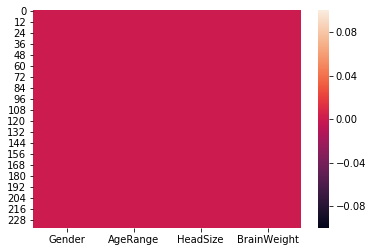

In [95]:
sns.heatmap(data.isnull())

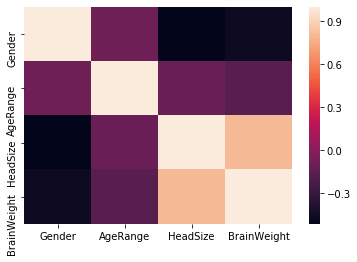

In [96]:
sns.heatmap(data.corr())

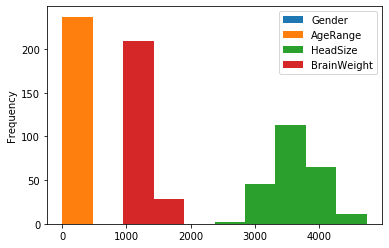

In [97]:
data.plot.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E9E2898>,
      dtype=object)

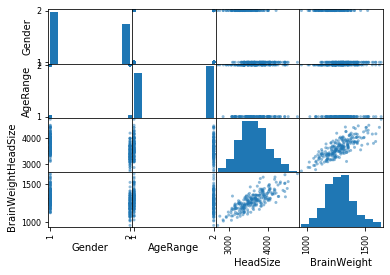

In [98]:
from pandas.plotting import scatter_matrix
scatter_matrix(data)

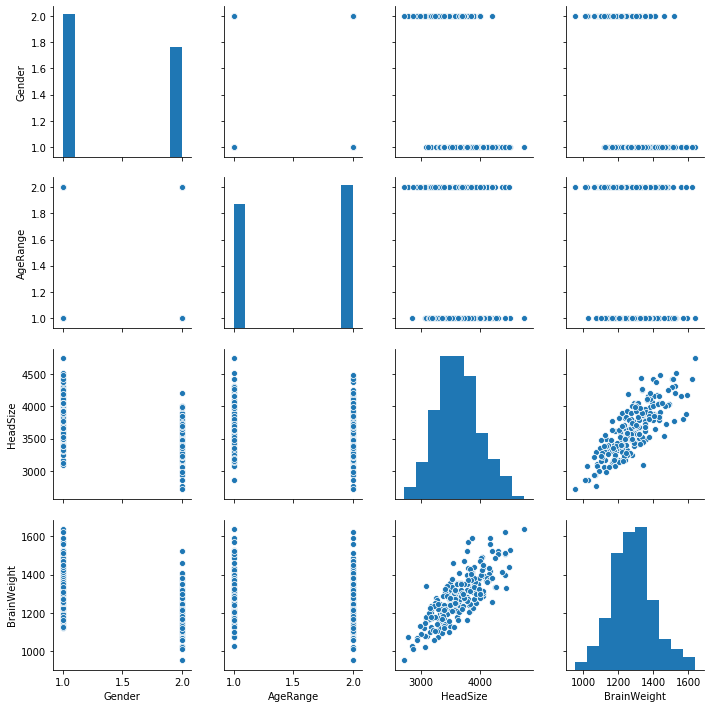

In [99]:
sns.pairplot(data)

# CHECKING OUTLIERS

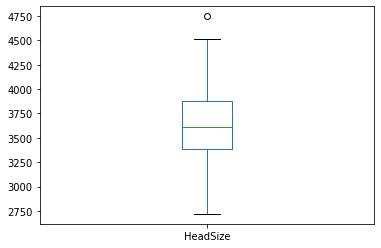

In [100]:
data["HeadSize"].plot.box()

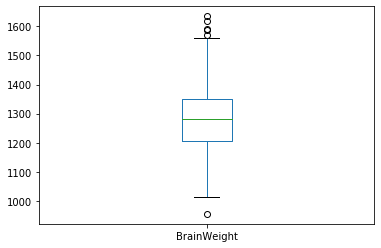

In [101]:
data["BrainWeight"].plot.box()

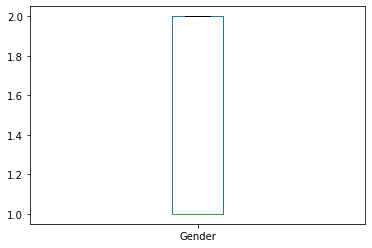

In [102]:
data["Gender"].plot.box()

In [103]:
from scipy.stats import zscore
z=np.abs(zscore(data))
z

array([[0.8767307 , 1.07449777, 2.40886829, 2.0579083 ],
       [0.8767307 , 1.07449777, 0.28535333, 0.11763692],
       [0.8767307 , 1.07449777, 1.72023489, 0.43407603],
       [0.8767307 , 1.07449777, 0.39235214, 0.00727325],
       [0.8767307 , 1.07449777, 1.4897759 , 2.557549  ],
       [0.8767307 , 1.07449777, 0.13441126, 0.14261896],
       [0.8767307 , 1.07449777, 0.41430062, 0.97535345],
       [0.8767307 , 1.07449777, 0.2057438 , 0.23211156],
       [0.8767307 , 1.07449777, 0.05759159, 0.60062293],
       [0.8767307 , 1.07449777, 0.95478182, 0.76716983],
       [0.8767307 , 1.07449777, 0.52399669, 0.47571276],
       [0.8767307 , 1.07449777, 0.98496097, 0.80880656],
       [0.8767307 , 1.07449777, 0.01648451, 0.60062293],
       [0.8767307 , 1.07449777, 1.57482624, 1.99128954],
       [0.8767307 , 1.07449777, 0.54324791, 0.62349678],
       [0.8767307 , 1.07449777, 0.66396452, 1.01699018],
       [0.8767307 , 1.07449777, 0.37584448, 0.62560497],
       [0.8767307 , 1.07449777,

In [104]:
threshold=3
print(np.where(z>3))

(array([24], dtype=int64), array([2], dtype=int64))


In [105]:
data=data[(z<3).all(axis=1)]

In [106]:
from sklearn.preprocessing import normalize
data=normalize(data)
data

array([[2.09892151e-04, 2.09892151e-04, 9.47033384e-01, 3.21134990e-01],
       [2.52740870e-04, 2.52740870e-04, 9.44745370e-01, 3.27804908e-01],
       [2.23952242e-04, 2.23952242e-04, 9.54260502e-01, 2.98976243e-01],
       [2.50711975e-04, 2.50711975e-04, 9.46939131e-01, 3.21412752e-01],
       [2.23744269e-04, 2.23744269e-04, 9.34579813e-01, 3.55753388e-01],
       [2.62231307e-04, 2.62231307e-04, 9.40099237e-01, 3.40900700e-01],
       [2.47793413e-04, 2.47793413e-04, 9.37898070e-01, 3.46910779e-01],
       [2.64985440e-04, 2.64985440e-04, 9.43083179e-01, 3.32556727e-01],
       [2.59152633e-04, 2.59152633e-04, 9.36318464e-01, 3.51151818e-01],
       [2.37376720e-04, 2.37376720e-04, 9.45234100e-01, 3.26392990e-01],
       [2.70667458e-04, 2.70667458e-04, 9.31908059e-01, 3.62694394e-01],
       [2.36700805e-04, 2.36700805e-04, 9.45146313e-01, 3.26647110e-01],
       [2.57465070e-04, 2.57465070e-04, 9.37172855e-01, 3.48865170e-01],
       [2.23474149e-04, 2.23474149e-04, 9.40379220e

In [107]:
df=pd.DataFrame(data)
df.head()

,0,1,2,3
0,0.000210,0.000210,0.947033,0.321135
1,0.000253,0.000253,0.944745,0.327805
2,0.000224,0.000224,0.954261,0.298976
3,0.000251,0.000251,0.946939,0.321413
4,0.000224,0.000224,0.934580,0.355753


In [108]:
x=df.drop(3,axis=1)
x.head()

,0,1,2
0,0.000210,0.000210,0.947033
1,0.000253,0.000253,0.944745
2,0.000224,0.000224,0.954261
3,0.000251,0.000251,0.946939
4,0.000224,0.000224,0.934580


In [109]:
y=df[3]
y.head()

0    0.321135
1    0.327805
2    0.298976
3    0.321413
4    0.355753
Name: 3, dtype: float64

In [110]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
max_r_score=0
for r_state in range (0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=r_state)
    lr=linear_model.LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to",final_r_state,'is',max_r_score)

max r2 score corresponding to 25 is 0.9991017838082902


In [111]:
lr=LinearRegression()

In [112]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [113]:
predlr=lr.predict(x_test)

In [114]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [115]:
print(r2_score(y_test,predlr))
print(mean_squared_error(y_test,predlr))

0.9983523964685397
4.0467923790507157e-07


In [117]:
from sklearn.tree import DecisionTreeRegressor  

In [118]:
dtc=DecisionTreeRegressor()

In [119]:
dtc.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [120]:
preddtc=dtc.predict(x_test)

In [121]:
print(r2_score(y_test,preddtc))
print(mean_squared_error(y_test,preddtc))

0.9974532370362266
6.255279717634986e-07


In [122]:
#MODEL SAVING
from sklearn.externals import joblib
joblib.dump(lr,"Headbrain.pkl")

C:\Users\max\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['Headbrain.pkl']